<a href="https://colab.research.google.com/github/jakuberwid/LMAD/blob/main/inercja_stud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Inercja

suma kwadratów różnic pomiędzy każdym obiektem ($x_i$) a środkiem klastra ($C_k$):

$$\sum_{i=1}^{n}(x_i - C_k)^2$$

 - niższe wartości wskazują na wyodrębnienie bardziej spójnych grup.

In [ ]:
import numpy as np
import pandas as pd
from plotnine import *

from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs

In [ ]:
n = 100

centra = [(-6,-6), (0,0), (6,6), (9,9)]

X, y = make_blobs(n_samples=n, n_features=2, centers=centra, cluster_std=1, random_state=0)

In [ ]:
df = pd.DataFrame(X, columns =['x1', 'x2'])

In [ ]:
df['Grupy'] = y

In [ ]:
df

,x1,x2,Grupy
0,-5.845053,-5.621837,0
1,8.356382,6.776597,3
2,0.066517,0.302472,1
3,7.895617,9.052165,3
4,8.544467,9.017479,3
...,...,...,...
95,-1.070753,1.054452,1
96,5.087178,7.117016,2
97,0.126912,0.401989,1
98,6.947252,5.844990,2


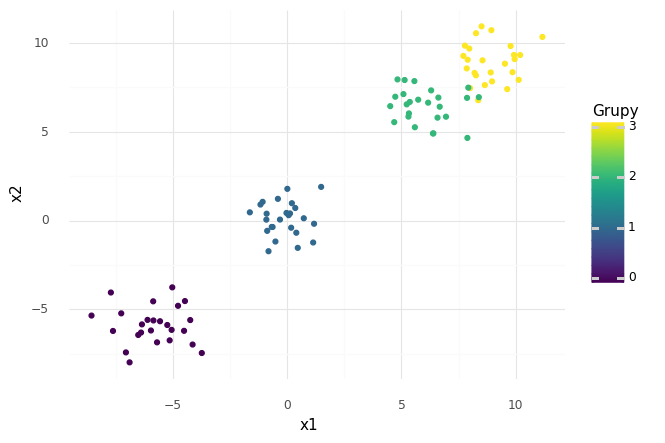

<ggplot: (8792613404913)>

In [ ]:
(ggplot(df, aes(x= 'x1', y = 'x2', color = 'Grupy')) +
 geom_point() +
 theme_minimal() +
 labs())

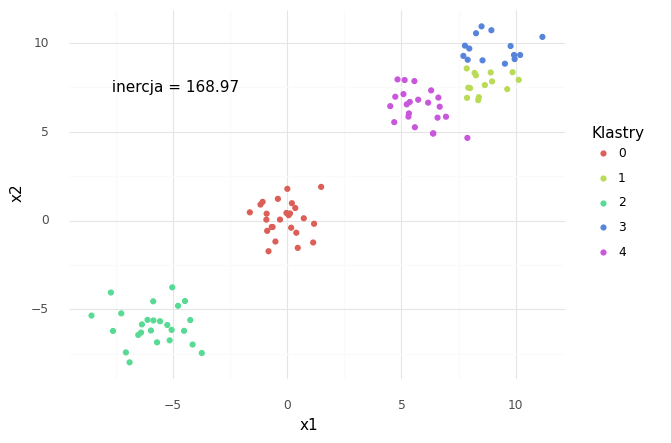

<ggplot: (8792613309945)>

In [ ]:
# k-means
km_2 = KMeans(n_clusters=5).fit(df[['x1', 'x2']])

# dodanie do ramki kolumny z etykietami klastrów
df['klastry_2'] = km_2.labels_
# df['klastry_2'] = km_2.prdict(df[['x1', 'x2']])

# wykres
(ggplot(df, aes(x= 'x1', y = 'x2', color = 'factor(klastry_2)')) +
 geom_point() +
 annotate(geom = 'text', x= -5, y =7.5, label = f' inercja = {round (km_2.inertia_,2)}') +
 theme_minimal() +
 labs(color = 'Klastry'))

In [ ]:
km_2.inertia_

168.96857715055899

## Wykres osypiska

Wizualizacja wartości inercji dla wyników grupowania z przyjętymi podziałami na $k$ klastrów. Szukamy punktu, przy którym następuje spadek przyrostu inercji. Jak podaje Krzyśko i in. (2008, s. 354), wraz ze wzrostem liczby klastrów, suma wariancji wewnątrzgrupowej maleje. Zatem w celu wybrania optymalnej liczby klastrów można posłużyć się zestawieniem na wykresie sum wariancji wewnątrzgrupowych wraz z liczbą klastrów i zastosować heurystyczne podejście zwane metodą łokcia – znaleźć punkt silnego przegięcia, po którym suma wariancji przestaje znacząco spadać. Ten punkt sugeruje, że podział na coraz większą liczbę skupisk w niewielkim stopniu wpływa na podniesienie jakości grupowania (wyodrębnienia spójnych klastrów). 

In [ ]:
ks = range(2, 20)
inercje = []
for k in ks:
  km =KMeans (n_clusters=k).fit(df[['x1','x2']])
  inercje.append(km.inertia_)

In [ ]:
inercje_df = pd.DataFrame({'K': ks,
                           'inercja' : inercje})

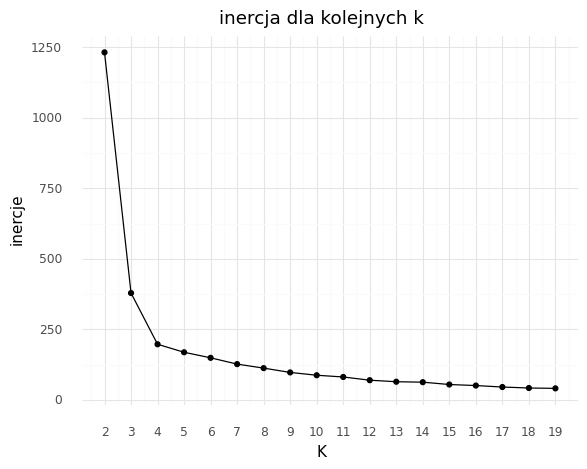

<ggplot: (8792613380789)>

In [ ]:
(ggplot(inercje_df, aes(x= 'K', y = 'inercje')) +
 geom_point() +
 geom_line() + 
 scale_x_continuous (breaks = ks) +
 theme_minimal() +
 labs (title = 'inercja dla kolejnych k'))